In [2]:
# API - http://ec2-52-53-95-229.us-west-1.compute.amazonaws.com:8080/svc/conditionalSampling2Var
from io import BytesIO
import requests
import xarray as xr
import hvplot.xarray

def download_data(url):
    r = requests.get(url)
    buf = BytesIO(r.content)
    return xr.open_dataset(buf)

# Generate data remotely
cmda_url = 'http://ec2-52-53-95-229.us-west-1.compute.amazonaws.com:8080/svc/conditionalSampling2Var'
    
query = dict(
    model1='GFDL_ESM2G',
    var1='cct',
    pres1=-999999,
    model2='GFDL_ESM2G',
    var2='cl',
    pres2='500',
    model3='GFDL_ESM2G',
    var3='hur',
    pres3='500',
    purpose='',
    lonS=0,
    lonE=360,
    latS=-90,
    latE=90,
    timeS=200401,
    timeE=200412,
    pres1a=-999999,
    months='1,2,3,4,5,6,7,8,9,10,11,12',
    scale3=0,
    binN2=0,
    binMax2=-999999,
    binMin2=-999999,
    binN3=0,
    binMax3=-999999,
    binMin3=-999999
)

r = requests.get(cmda_url, params=query)
print(r.url)
print(r.status_code)
# print(r.text)

http://ec2-52-53-95-229.us-west-1.compute.amazonaws.com:8080/svc/conditionalSampling2Var?model1=GFDL_ESM2G&var1=cct&pres1=-999999&model2=GFDL_ESM2G&var2=cl&pres2=500&model3=GFDL_ESM2G&var3=hur&pres3=500&purpose=&lonS=0&lonE=360&latS=-90&latE=90&timeS=200401&timeE=200412&pres1a=-999999&months=1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12&scale3=0&binN2=0&binMax2=-999999&binMin2=-999999&binN3=0&binMax3=-999999&binMin3=-999999
200


In [3]:
# Download data into xarray Dataset object
data_url = r.json()['dataUrl']
ds = download_data(data_url)
print(ds.info())
ds

xarray.Dataset {
dimensions:
	clBin = 20 ;
	hurBin = 20 ;

variables:
	float64 clBin(clBin) ;
		clBin:units = % ;
	float64 hurBin(hurBin) ;
		hurBin:units = % ;
	float32 cct(hurBin, clBin) ;
		cct:units = Pa ;
		cct:long_name = Air Pressure at Convective Cloud Top ;
	float32 cct_nSample(hurBin, clBin) ;
		cct_nSample:units = 1 ;
		cct_nSample:long_name = Air Pressure at Convective Cloud Top number of samples in bins ;
	float32 cct_std(hurBin, clBin) ;
		cct_std:units = Pa ;
		cct_std:long_name = Air Pressure at Convective Cloud Top standard deviations ;

// global attributes:
	:title = Air Pressure at Convective Cloud Top, sorted by Cloud Area Fraction and Relative Humidity, 2004/01-2004/12 ;
	:x_labelStr = Cloud Area Fraction at 500hPa (%) ;
	:y_labelStr = Relative Humidity at 500hPa (%) ;
}None


<xarray.Dataset>
Dimensions:      (clBin: 20, hurBin: 20)
Coordinates:
  * clBin        (clBin) float64 1.823 5.505 9.256 13.09 ... 71.0 75.54 84.35
  * hurBin       (hurBin) float64 4.956 9.721 14.49 19.25 ... 85.96 90.72 95.49
Data variables:
    cct          (hurBin, clBin) float32 ...
    cct_nSample  (hurBin, clBin) float32 ...
    cct_std      (hurBin, clBin) float32 ...
Attributes:
    title:       Air Pressure at Convective Cloud Top, sorted by Cloud Area F...
    x_labelStr:  Cloud Area Fraction at 500hPa (%)
    y_labelStr:  Relative Humidity at 500hPa (%)

In [5]:
ds.cct.hvplot.quadmesh(x='clBin',y='hurBin')

:QuadMesh   [clBin,hurBin]   (cct)

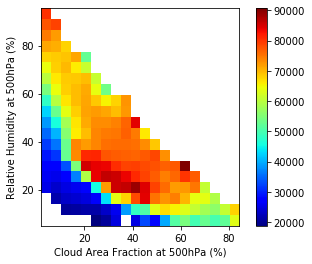

In [9]:
import matplotlib.pyplot as plt
im = plt.imshow(ds.cct, extent=[ds.clBin[0], ds.clBin[-1], ds.hurBin[0], ds.hurBin[-1]],cmap='jet')
plt.xlabel(ds.x_labelStr)
plt.ylabel(ds.y_labelStr)
cbar = plt.colorbar(im)
cbar.set_title()